## Mosquito Dataset

In [97]:
# Import Dataset 
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel("Mosquito_Dataset.xlsx")

# Inspect the data
data.head(10)


,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
0,kitamilo,spray,CA,yes,NaN,g,3,0,oocyst,oocyst,other,pcr,qpcr
1,kitamilo,spray,MH,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
2,kitamilo,spray,MH,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
3,kitamilo,spray,MI,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
4,kitamilo,spray,MI,yes,NaN,c,0,1,spz,spz,H,pcr,qpcr
5,kitamilo,spray,CA,yes,NaN,g,0,1,spz,spz,H,pcr,qpcr
6,kitamilo,spray,MH,yes,N,c,0,0,uninfected,uninfected,H,pcr,qpcr
7,kitamilo,spray,MH,yes,N,c,0,0,uninfected,uninfected,H,pcr,qpcr
8,kitamilo,spray,MH,yes,N,g,0,0,uninfected,uninfected,H,pcr,qpcr
9,kitamilo,spray,MH,yes,N,g,0,0,uninfected,uninfected,H,pcr,qpcr


In [98]:
data.tail()

,village,collection,origin,fed,parity,species.mol,oocyst,spz,infection,infection1,choice,RS_tech,spz_tech
2907,buvuma,spray,MH,yes,NaN,NaN,0,0,uninfected,uninfected,other,ELISA,ELISA
2908,buvuma,spray,MH,yes,NaN,NaN,0,0,uninfected,uninfected,other,ELISA,ELISA
2909,buvuma,spray,MH,yes,NaN,NaN,0,0,uninfected,uninfected,other,ELISA,ELISA
2910,buvuma,spray,MH,yes,NaN,NaN,0,0,uninfected,uninfected,other,ELISA,ELISA
2911,buvuma,spray,MH,yes,NaN,NaN,0,0,uninfected,uninfected,other,ELISA,ELISA


In [99]:
#check the decoration
data.columns

Index(['village', 'collection', 'origin', 'fed', 'parity', 'species.mol ',
       'oocyst', 'spz', 'infection', 'infection1', 'choice', 'RS_tech',
       'spz_tech'],
      dtype='object')

## Data Examination & Exploration

In [100]:
# Data information
# Data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   village       2912 non-null   object
 1   collection    2912 non-null   object
 2   origin        2912 non-null   object
 3   fed           2912 non-null   object
 4   parity        398 non-null    object
 5   species.mol   506 non-null    object
 6   oocyst        2912 non-null   int64 
 7   spz           2912 non-null   int64 
 8   infection     2912 non-null   object
 9   infection1    2912 non-null   object
 10  choice        2912 non-null   object
 11  RS_tech       2912 non-null   object
 12  spz_tech      2912 non-null   object
dtypes: int64(2), object(11)
memory usage: 295.9+ KB


In [101]:
# Basic data statistics
data.describe()

,oocyst,spz
count,2912.000000,2912.000000
mean,0.335165,0.080014
std,3.303126,0.271361
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,78.000000,1.000000


In [102]:
# Data statistics for object columns (Text columns)
data.describe(include=object)

,village,collection,origin,fed,parity,species.mol,infection,infection1,choice,RS_tech,spz_tech
count,2912,2912,2912,2912,398,506,2912,2912,2912,2912,2912
unique,3,3,5,2,2,3,3,4,2,2,2
top,bukomansimbi,spray,MH,yes,P,c,uninfected,uninfected,H,ELISA,qpcr
freq,1551,2328,1731,2505,233,277,2532,2532,1823,2640,1823


## Data Cleaning

In [103]:
# Check for missing values
data.isnull().sum()

village            0
collection         0
origin             0
fed                0
parity          2514
species.mol     2406
oocyst             0
spz                0
infection          0
infection1         0
choice             0
RS_tech            0
spz_tech           0
dtype: int64

In [104]:
# Drop the columns with null values
data = data.dropna(axis=1)

## Data Visualization

C:\Users\user\AppData\Local\Temp\ipykernel_15852\2642762905.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['oocyst']);


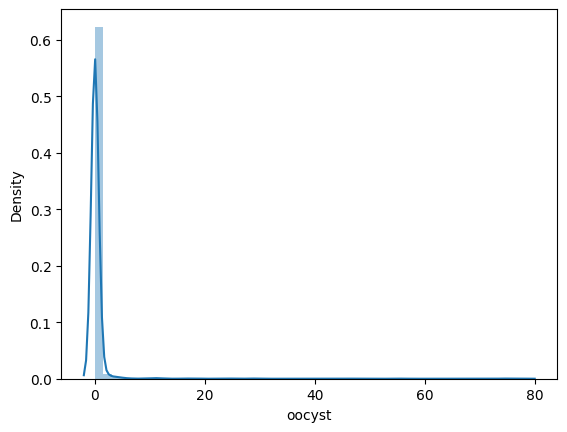

In [105]:
# Data visualization of target variable
# histogram of target variable
sns.distplot(data['oocyst']);